In [160]:
import pandas as pd
import sqlalchemy
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# Deutsche Bahn Data

## Exploration

In [161]:
station_df = pd.read_sql("select * from stations", "sqlite:///data.sqlite")
station_df

,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
0,8002551,AELB,de:02000:11943,Hamburg Elbbrücken,RV,"10,0245","53,5345",DB Station und Service AG,0,neu
1,8001944,TETN,,Eutingen Nord,RV,"8,7531","48,4847",DB Station und Service AG,0,neu
2,8003074,MIA,,Ingolstadt Audi,RV,"11,4074564","48,7904959",DB Station und Service AG,0,neu
3,8001723,HEBA,,Einbeck Otto-Hahn-Straße,RV,"9,89290953","51,8144784",Ilmebahn GmbH,0,neu
4,8004371,KRO,,Nörvenich-Rommelsheim,nur DPN,"6,547586","50,782539",Rurtalbahn GmbH,0,neu
...,...,...,...,...,...,...,...,...,...,...
6514,8003318,SKB,de:10041:8003318,Kleinblittersdorf,nur DPN,"7,033459","49,157289",DB Station und Service AG,3243,
6515,8085007,TBO H,de:08115:4712,Böblingen Heusteigstr,nur DPN,"9,025771","48,675633",Zweckverband Schönbuchbahn,0,
6516,8085006,TBOS,de:08115:6742,Böblingen Südbf,nur DPN,"9,010509","48,677236",Zweckverband Schönbuchbahn,0,
6517,8085008,TBO Z,de:08115:4713,Böblingen Zimmerschlag,nur DPN,"9,03522491","48,6704564",Zweckverband Schönbuchbahn,0,


In [162]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EVA_NR          6519 non-null   int64 
 1   DS100           6519 non-null   object
 2   IFOPT           6519 non-null   object
 3   NAME            6519 non-null   object
 4   Verkehr         6519 non-null   object
 5   Laenge          6519 non-null   object
 6   Breite          6519 non-null   object
 7   Betreiber_Name  6519 non-null   object
 8   Betreiber_Nr    6519 non-null   int64 
 9   Status          6519 non-null   object
dtypes: int64(2), object(8)
memory usage: 509.4+ KB


In [163]:
station_df = station_df[['EVA_NR', 'NAME', 'Laenge', 'Breite']]
station_df["Laenge"] = station_df["Laenge"].replace(to_replace=r",", value=".",regex=True)
station_df["Breite"] = station_df["Breite"].replace(to_replace=r",", value=".",regex=True)
station_df["Laenge"] = station_df["Laenge"].astype(float)
station_df["Breite"] = station_df["Breite"].astype(float)
station_df = station_df[station_df['Breite'].notnull()]
station_df = station_df[station_df['Laenge'].notnull()]
station_df = station_df.rename({"NAME":"station_name", "Laenge":"laenge", "Breite":"breite"}, axis=1)
station_df

/tmp/ipykernel_18597/92561169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df["Laenge"] = station_df["Laenge"].replace(to_replace=r",", value=".",regex=True)
/tmp/ipykernel_18597/92561169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df["Breite"] = station_df["Breite"].replace(to_replace=r",", value=".",regex=True)
/tmp/ipykernel_18597/92561169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,EVA_NR,station_name,laenge,breite
0,8002551,Hamburg Elbbrücken,10.024500,53.534500
1,8001944,Eutingen Nord,8.753100,48.484700
2,8003074,Ingolstadt Audi,11.407456,48.790496
3,8001723,Einbeck Otto-Hahn-Straße,9.892910,51.814478
4,8004371,Nörvenich-Rommelsheim,6.547586,50.782539
...,...,...,...,...
6514,8003318,Kleinblittersdorf,7.033459,49.157289
6515,8085007,Böblingen Heusteigstr,9.025771,48.675633
6516,8085006,Böblingen Südbf,9.010509,48.677236
6517,8085008,Böblingen Zimmerschlag,9.035225,48.670456


In [164]:
train_df = pd.read_sql("select * from  train_plan", "sqlite:///data.sqlite")
train_df.drop(['trip_type', 'train_type', 'train_number', 'train_line'], axis=1, inplace=True)
train_df

,EVA_NR,stop_id,platform,next_stations,passed_stations,arrival,departure
0,8002551,1526668602924455080-2306231419-17,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:02,2023-06-23 15:03
1,8002551,6977409607832244681-2306231509-17,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:52,2023-06-23 15:53
2,8002551,-5111924738234825652-2306231439-17,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:22,2023-06-23 15:23
3,8002551,6291742665274187514-2306231531-7,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:46,2023-06-23 15:47
4,8002551,-1322376234853055478-2306231509-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:30,2023-06-23 15:30
5,8002551,7852440586596996407-2306231521-7,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:36,2023-06-23 15:37
6,8002551,-7934430094175071875-2306231541-7,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:56,2023-06-23 15:57
7,8002551,1661262517537530442-2306231449-17,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:32,2023-06-23 15:33
8,8002551,197643870764197866-2306231523-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:44,2023-06-23 15:44
9,8002551,-4335795472862065294-2306231449-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:10,2023-06-23 15:10


In [165]:
plan_change_df = pd.read_sql("select * from  plan_change", "sqlite:///data.sqlite")
plan_change_df

,EVA_NR,stop_id,next_stations,passed_stations,arrival,departure,platform
0,8002551,1220914250780058911-2306231409-17,N/A,N/A,2023-06-23 14:54,2023-06-23 14:56,N/A
1,8002551,3112418789864622684-2306231329-17,N/A,N/A,2023-06-23 14:18,2023-06-23 14:19,N/A
2,8002551,3167902116456106718-2306231413-8,N/A,N/A,2023-06-23 14:36,2023-06-23 14:37,N/A
3,8002551,-5174114455949413054-2306231503-8,N/A,N/A,2023-06-23 15:24,2023-06-23 15:24,N/A
4,8002551,-3474712568094850718-2306231401-7,N/A,N/A,2023-06-23 14:20,2023-06-23 14:21,N/A
...,...,...,...,...,...,...,...
189,8002551,3417151617663216527-2306230719-8,N/A,N/A,2023-06-23 07:41,2023-06-23 07:42,N/A
190,8002551,7803788085737993624-2306230649-17,N/A,N/A,2023-06-23 07:33,2023-06-23 07:34,N/A
191,8002551,5894372900418513902-2306230709-8,N/A,N/A,2023-06-23 07:31,2023-06-23 07:32,N/A
192,8002551,9212721930182781921-2306230659-8,N/A,N/A,2023-06-23 07:24,2023-06-23 07:25,N/A


In [166]:
train_change_df = pd.merge(left=train_df, right=plan_change_df, on='stop_id', how='inner')
train_change_df.drop(["EVA_NR_y", "stop_id"], axis=1, inplace=True)
train_change_df.rename({"EVA_NR_x":"EVA_NR"}, axis=1, inplace=True)
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y
0,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:02,2023-06-23 15:03,N/A,N/A,2023-06-23 15:02,2023-06-23 15:03,N/A
1,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:22,2023-06-23 15:23,N/A,N/A,2023-06-23 15:22,2023-06-23 15:23,N/A
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:30,2023-06-23 15:30,N/A,N/A,2023-06-23 15:30,2023-06-23 15:30,N/A
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:32,2023-06-23 15:33,N/A,N/A,2023-06-23 15:32,2023-06-23 15:33,N/A
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:10,2023-06-23 15:10,N/A,N/A,2023-06-23 15:10,2023-06-23 15:10,N/A
5,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:16,2023-06-23 15:17,N/A,N/A,2023-06-23 15:16,2023-06-23 15:17,N/A
6,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:06,2023-06-23 15:07,N/A,N/A,2023-06-23 15:11,2023-06-23 15:12,N/A
7,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:42,2023-06-23 15:43,N/A,N/A,2023-06-23 15:42,2023-06-23 15:43,N/A
8,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:14,2023-06-23 15:14,N/A,N/A,2023-06-23 15:14,2023-06-23 15:14,N/A
9,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:12,2023-06-23 15:13,N/A,N/A,2023-06-23 15:12,2023-06-23 15:13,N/A


In [167]:
train_change_df = pd.merge(left=train_change_df, right=station_df, on="EVA_NR", how="inner")
train_change_df.reset_index(inplace=True, drop=True)
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite
0,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:02,2023-06-23 15:03,N/A,N/A,2023-06-23 15:02,2023-06-23 15:03,N/A,Hamburg Elbbrücken,10.0245,53.5345
1,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:22,2023-06-23 15:23,N/A,N/A,2023-06-23 15:22,2023-06-23 15:23,N/A,Hamburg Elbbrücken,10.0245,53.5345
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:30,2023-06-23 15:30,N/A,N/A,2023-06-23 15:30,2023-06-23 15:30,N/A,Hamburg Elbbrücken,10.0245,53.5345
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:32,2023-06-23 15:33,N/A,N/A,2023-06-23 15:32,2023-06-23 15:33,N/A,Hamburg Elbbrücken,10.0245,53.5345
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:10,2023-06-23 15:10,N/A,N/A,2023-06-23 15:10,2023-06-23 15:10,N/A,Hamburg Elbbrücken,10.0245,53.5345
5,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:16,2023-06-23 15:17,N/A,N/A,2023-06-23 15:16,2023-06-23 15:17,N/A,Hamburg Elbbrücken,10.0245,53.5345
6,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:06,2023-06-23 15:07,N/A,N/A,2023-06-23 15:11,2023-06-23 15:12,N/A,Hamburg Elbbrücken,10.0245,53.5345
7,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:42,2023-06-23 15:43,N/A,N/A,2023-06-23 15:42,2023-06-23 15:43,N/A,Hamburg Elbbrücken,10.0245,53.5345
8,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:14,2023-06-23 15:14,N/A,N/A,2023-06-23 15:14,2023-06-23 15:14,N/A,Hamburg Elbbrücken,10.0245,53.5345
9,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 15:12,2023-06-23 15:13,N/A,N/A,2023-06-23 15:12,2023-06-23 15:13,N/A,Hamburg Elbbrücken,10.0245,53.5345


In [168]:
train_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVA_NR             15 non-null     int64  
 1   platform_x         15 non-null     object 
 2   next_stations_x    15 non-null     object 
 3   passed_stations_x  15 non-null     object 
 4   arrival_x          15 non-null     object 
 5   departure_x        15 non-null     object 
 6   next_stations_y    15 non-null     object 
 7   passed_stations_y  15 non-null     object 
 8   arrival_y          15 non-null     object 
 9   departure_y        15 non-null     object 
 10  platform_y         15 non-null     object 
 11  station_name       15 non-null     object 
 12  laenge             15 non-null     float64
 13  breite             15 non-null     float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.8+ KB


### Train Delay

In [169]:
train_change_df['arrival_x'] = pd.to_datetime(train_change_df['arrival_x'], format="%Y-%m-%d %H:%M")
train_change_df['arrival_y'] = pd.to_datetime(train_change_df['arrival_y'], format="%Y-%m-%d %H:%M")
train_change_df['departure_x'] = pd.to_datetime(train_change_df['departure_x'], format="%Y-%m-%d %H:%M")
train_change_df['departure_y'] = pd.to_datetime(train_change_df['departure_y'], format="%Y-%m-%d %H:%M")
arrival_difference = train_change_df['arrival_y'] - train_change_df['arrival_x']
departure_difference = train_change_df['departure_y'] - train_change_df['departure_x']

train_change_df['arrival_difference'] = arrival_difference
train_change_df['departure_difference'] = departure_difference

print(f"Biggest arrival delay: {arrival_difference.max()}")
print(f"Biggest departure delay: {departure_difference.max()}")

Biggest arrival delay: 0 days 00:05:00
Biggest departure delay: 0 days 00:05:00


### Platform change

In [170]:
train_change_df[train_change_df['platform_y'] != "N/A"]

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference


### Planed path changes

In [171]:
train_change_df[train_change_df['next_stations_y'] != "N/A"]

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference


# Weather Data

## Exploration

In [172]:
weather_df = pd.read_sql("select * from raw_weather_data", "sqlite:///data.sqlite")
weather_df

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,5731,20211215,-999,-999.0,-999.0,3,0.0,0,-999.0,0,-999.0,6.5,-999.00,2.3,89.96,3.8,0.1,0.1,eor
1,5731,20211216,-999,-999.0,-999.0,3,0.0,0,-999.0,0,-999.0,6.5,-999.00,2.9,86.13,4.7,-0.1,-2.5,eor
2,5731,20211217,-999,-999.0,-999.0,3,0.0,0,-999.0,0,-999.0,6.9,-999.00,4.0,85.08,5.7,0.8,-1.2,eor
3,5731,20211218,-999,-999.0,-999.0,3,0.0,0,-999.0,0,-999.0,5.6,-999.00,1.2,84.63,5.2,-2.9,-5.1,eor
4,5731,20211219,-999,-999.0,-999.0,3,0.0,0,-999.0,0,-999.0,5.0,-999.00,-1.2,88.92,-0.2,-3.0,-2.5,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230535,2429,20230606,1,6.8,1.9,1,0.0,0,-999.0,-999,0.0,12.2,1018.30,15.3,72.25,22.5,7.9,3.1,eor
1230536,2429,20230607,1,6.1,1.9,1,0.0,0,-999.0,-999,2.0,11.7,1017.64,14.3,74.39,-999.0,-999.0,-999.0,eor
1230537,2429,20230608,1,5.9,1.8,1,0.0,0,-999.0,-999,2.4,11.8,1015.72,16.3,67.13,24.7,9.1,7.4,eor
1230538,2429,20230609,1,7.9,2.1,1,0.0,0,-999.0,-999,3.0,11.6,1015.38,18.5,60.50,27.9,8.0,4.1,eor


[Data description](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/recent/DESCRIPTION_obsgermany_climate_daily_kl_recent_en.pdf)

![Table](data/weather_data/Screenshot%20from%202023-06-11%2013-08-02.png)

In [173]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230540 entries, 0 to 1230539
Data columns (total 19 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   STATIONS_ID  1230540 non-null  int64  
 1   MESS_DATUM   1230540 non-null  int64  
 2   QN_3         1230540 non-null  int64  
 3     FX         1230540 non-null  float64
 4     FM         1230540 non-null  float64
 5   QN_4         1230540 non-null  int64  
 6    RSK         1230540 non-null  float64
 7   RSKF         1230540 non-null  int64  
 8    SDK         1230540 non-null  float64
 9   SHK_TAG      1230540 non-null  int64  
 10    NM         1230540 non-null  float64
 11   VPM         1230540 non-null  float64
 12    PM         1230540 non-null  float64
 13   TMK         1230540 non-null  float64
 14   UPM         1230540 non-null  float64
 15   TXK         1230540 non-null  float64
 16   TNK         1230540 non-null  float64
 17   TGK         1230540 non-null  float64
 18  eo

In [174]:
print(f"Number of recorded stations: {weather_df['STATIONS_ID'].nunique()}")

Number of recorded stations: 572


In [175]:
weather_df[" TMK"].describe()

count    1.230540e+06
mean    -1.088188e+02
std      3.244368e+02
min     -9.990000e+02
25%      1.600000e+00
50%      7.700000e+00
75%      1.390000e+01
max      3.170000e+01
Name:  TMK, dtype: float64

Mean tempreture in negative, which means a lot of -999 values (basically nan) 

In [176]:
nan_tempreture_df = weather_df.loc[weather_df[' TMK'] == -999]
print(f"Number of -999 (nan) in tempreture: {len(nan_tempreture_df)}")

Number of -999 (nan) in tempreture: 144235


In [177]:
weather_station_description_df = pd.read_sql("select * from weather_station_description", "sqlite:///data.sqlite")
weather_station_description_df

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00011,19800901,20200930,680,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,00044,19690101,20230622,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,00052,19690101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...,...,...,...
1345,19607,19720501,20010430,615,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,19410101,20061231,310,49.7391,10.6039,Burghaslach,Bayern
1347,19631,19060101,19691231,268,50.8083,10.2294,Salzungen,Thüringen
1348,19647,19510101,20051031,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [178]:
weather_station_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stations_id    1350 non-null   object
 1   von_datum      1350 non-null   object
 2   bis_datum      1350 non-null   object
 3   Stationshoehe  1350 non-null   object
 4   geoBreite      1350 non-null   object
 5   geoLaenge      1350 non-null   object
 6   Stationsname   1350 non-null   object
 7   Bundesland     1350 non-null   object
dtypes: object(8)
memory usage: 84.5+ KB


In [179]:
print(f"Number of all stations: {weather_station_description_df['Stations_id'].nunique()}")

Number of all stations: 1350


## Cleaning

In [180]:
clean_weather_df = weather_df.copy(deep=True)
clean_weather_df["MESS_DATUM"] = pd.to_datetime(clean_weather_df['MESS_DATUM'], format='%Y%m%d')

In [181]:
clean_weather_df = clean_weather_df[clean_weather_df[" TMK"] != -999]

In [182]:
clean_weather_df = clean_weather_df[["STATIONS_ID", "MESS_DATUM", " TMK"]]
clean_weather_df = clean_weather_df.rename({" TMK": "temperature", "MESS_DATUM":"date", "STATIONS_ID":"station_id"}, axis=1)
clean_weather_df["station_id"] = clean_weather_df["station_id"].astype(str)
clean_weather_df

,station_id,date,temperature
0,5731,2021-12-15,2.3
1,5731,2021-12-16,2.9
2,5731,2021-12-17,4.0
3,5731,2021-12-18,1.2
4,5731,2021-12-19,-1.2
...,...,...,...
1230535,2429,2023-06-06,15.3
1230536,2429,2023-06-07,14.3
1230537,2429,2023-06-08,16.3
1230538,2429,2023-06-09,18.5


In [197]:
clean_weather_df['date'].max()

Timestamp('2023-06-22 00:00:00')

In [183]:
weather_station_description_df = weather_station_description_df[["Stations_id", "geoBreite", "geoLaenge", "Stationsname", "Bundesland"]]
weather_station_description_df = weather_station_description_df[weather_station_description_df['geoBreite'].notnull()]
weather_station_description_df = weather_station_description_df[weather_station_description_df['geoLaenge'].notnull()]
weather_station_description_df = weather_station_description_df.rename({"Stations_id": "station_id", "Stationsname": "station_name"}, axis=1)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(int)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(str)
weather_station_description_df

,station_id,geoBreite,geoLaenge,station_name,Bundesland
0,1,47.8413,8.8493,Aach,Baden-Württemberg
1,3,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,11,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,52,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...
1345,19607,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,49.7391,10.6039,Burghaslach,Bayern
1347,19631,50.8083,10.2294,Salzungen,Thüringen
1348,19647,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [184]:
merged_weather_df = pd.merge(left=clean_weather_df, right=weather_station_description_df, on='station_id', copy=True, how="left")
merged_weather_df.rename({"geoBreite":"breite", "geoLaenge":"laenge"}, axis=1, inplace=True)
merged_weather_df['breite'] = merged_weather_df['breite'].astype(float)
merged_weather_df['laenge'] = merged_weather_df['laenge'].astype(float)
merged_weather_df

,station_id,date,temperature,breite,laenge,station_name,Bundesland
0,5731,2021-12-15,2.3,47.6783,8.3801,Wutöschingen-Ofteringen,Baden-Württemberg
1,5731,2021-12-16,2.9,47.6783,8.3801,Wutöschingen-Ofteringen,Baden-Württemberg
2,5731,2021-12-17,4.0,47.6783,8.3801,Wutöschingen-Ofteringen,Baden-Württemberg
3,5731,2021-12-18,1.2,47.6783,8.3801,Wutöschingen-Ofteringen,Baden-Württemberg
4,5731,2021-12-19,-1.2,47.6783,8.3801,Wutöschingen-Ofteringen,Baden-Württemberg
...,...,...,...,...,...,...,...
1086300,2429,2023-06-06,15.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
1086301,2429,2023-06-07,14.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
1086302,2429,2023-06-08,16.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
1086303,2429,2023-06-09,18.5,53.9897,9.5697,Itzehoe,Schleswig-Holstein


In [185]:
merged_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086305 entries, 0 to 1086304
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   station_id    1086305 non-null  object        
 1   date          1086305 non-null  datetime64[ns]
 2   temperature   1086305 non-null  float64       
 3   breite        1086305 non-null  float64       
 4   laenge        1086305 non-null  float64       
 5   station_name  1086305 non-null  object        
 6   Bundesland    1086305 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 58.0+ MB


In [186]:
merged_weather_df.to_sql("weather_data_processed", "sqlite:///data.sqlite", index=False, if_exists='replace')

1086305

## Analysis

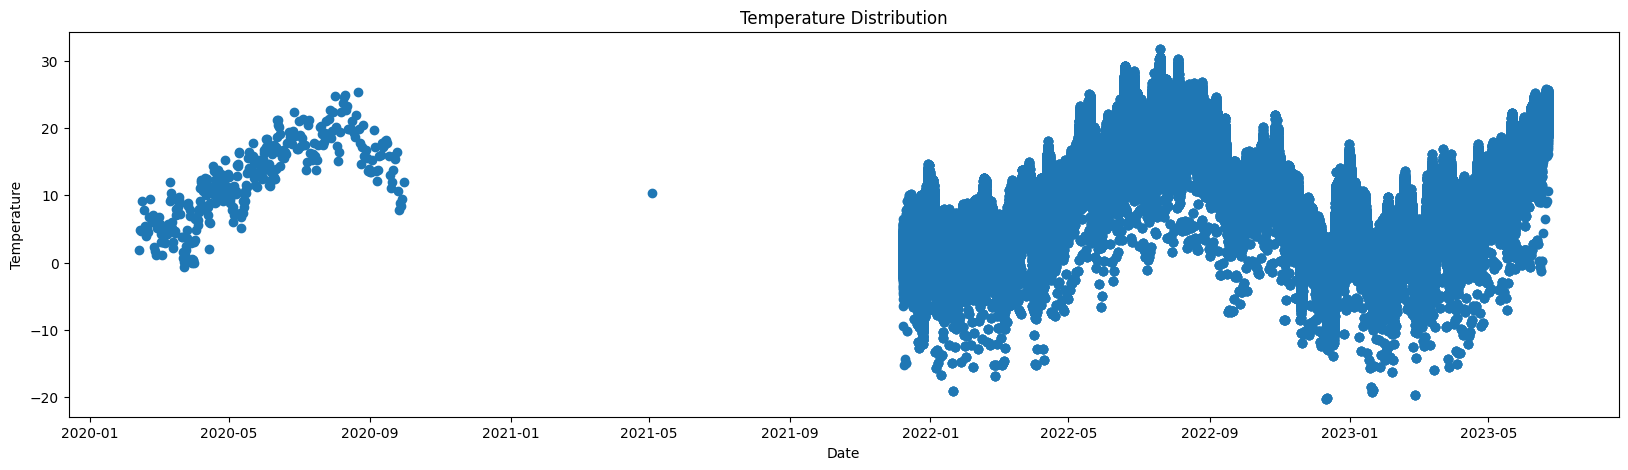

In [187]:
# px.box(merged_weather_df, x='date', y='temperature').show(renderer='vscode')
plt.figure(figsize=(20, 5))
plt.plot_date(merged_weather_df['date'], merged_weather_df['temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Distribution")
plt.show();

In [188]:
tmp = merged_weather_df.query("date < '2020-11' and date > '2020-06'")
print(f"Number of recorded tempretures betweent 2020-06 & 2020-11: {len(tmp)}")
print(f"Number of recorded days betweent 2020-06 & 2020-11: {len(tmp['date'].unique())}")
print(f"Number of recorded stations betweent 2020-06 & 2020-11: {tmp['station_id'].nunique()}")

Number of recorded tempretures betweent 2020-06 & 2020-11: 135
Number of recorded days betweent 2020-06 & 2020-11: 121
Number of recorded stations betweent 2020-06 & 2020-11: 2


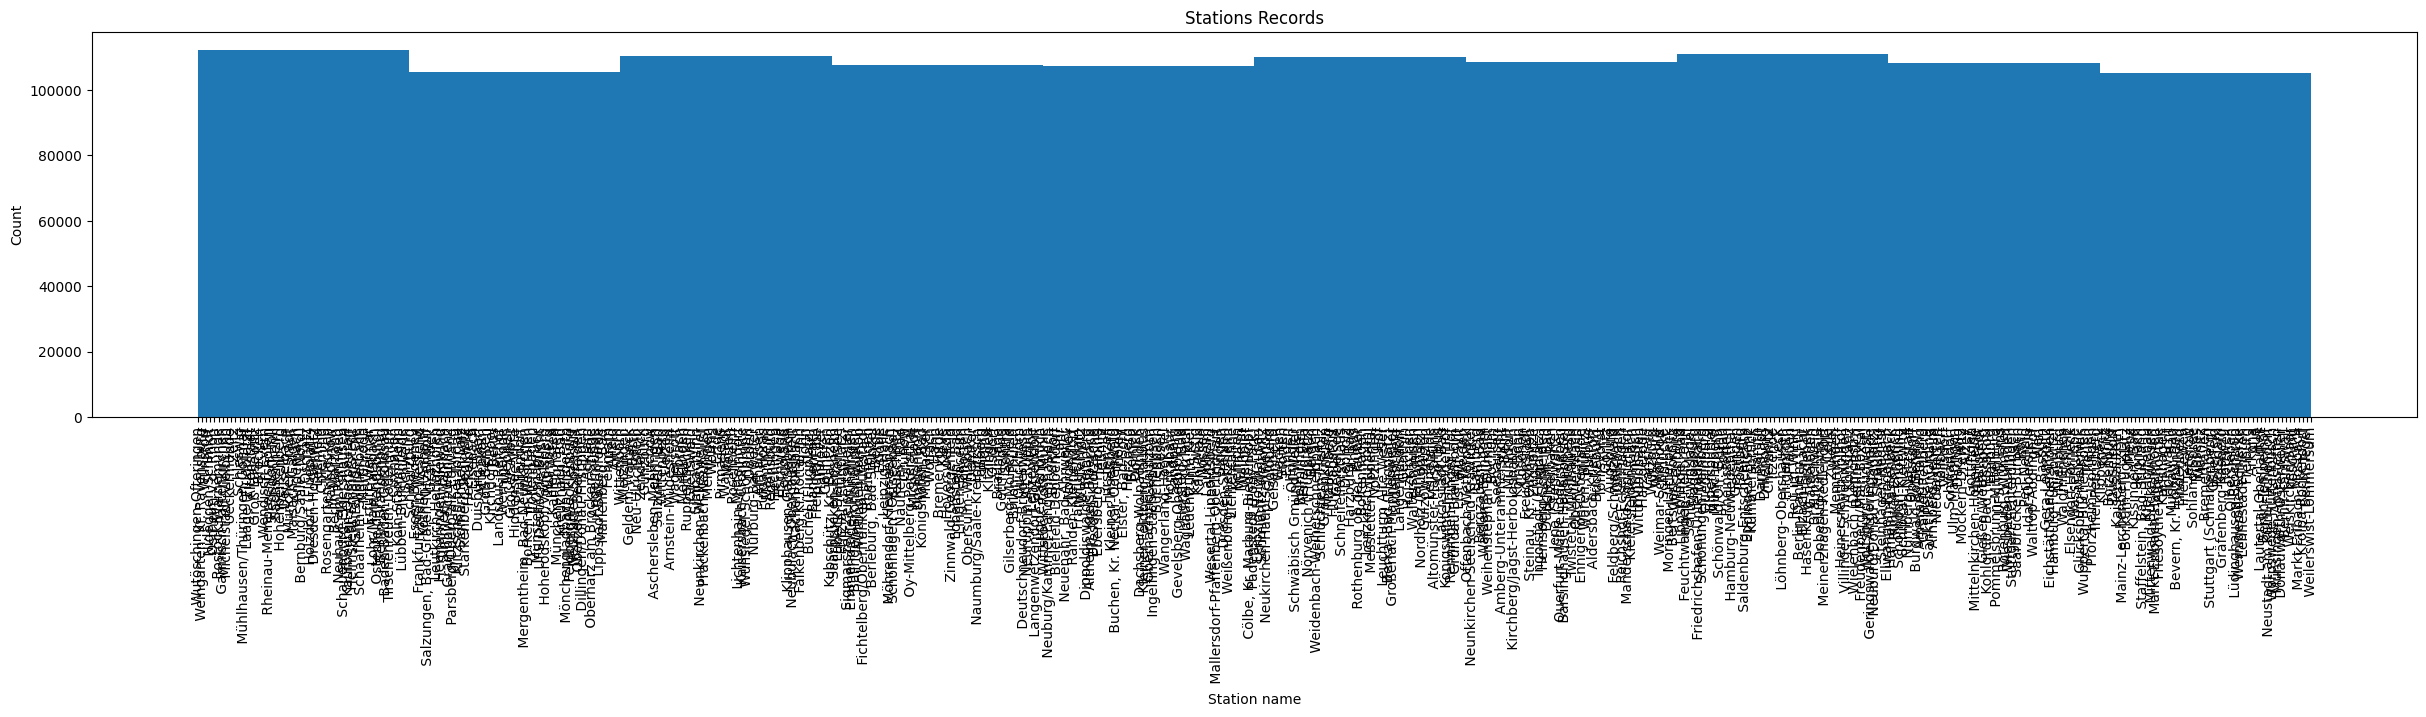

In [189]:
plt.figure(figsize=(30, 5))
plt.hist(merged_weather_df['station_name'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Station name")
plt.title("Stations Records")
plt.show()

# Data combination

In [190]:
DELAY_THRESHOLD = "00:01:00"

In [191]:
delayed_train_df = train_change_df.query(f"arrival_difference > '{DELAY_THRESHOLD}' or departure_difference > '{DELAY_THRESHOLD}'")
delayed_train_df.reset_index(inplace=True, drop=True)
delayed_train_df.head()

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference
0,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:06:00,2023-06-23 15:07:00,N/A,N/A,2023-06-23 15:11:00,2023-06-23 15:12:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:05:00,0 days 00:05:00
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:04:00,2023-06-23 15:04:00,N/A,N/A,2023-06-23 15:07:00,2023-06-23 15:07:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:03:00,0 days 00:03:00


In [201]:
def to_minuit(x):
    return x.seconds/60
delayed_train_df['arrival_difference_minuit'] = delayed_train_df['arrival_difference'].apply(to_minuit)
delayed_train_df['departure_difference_minuit'] = delayed_train_df['departure_difference'].apply(to_minuit)
delayed_train_df

/tmp/ipykernel_18597/1573498062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_train_df['arrival_difference_minuit'] = delayed_train_df['arrival_difference'].apply(to_minuit)
/tmp/ipykernel_18597/1573498062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_train_df['departure_difference_minuit'] = delayed_train_df['departure_difference'].apply(to_minuit)


,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference,arrival_difference_minuit,departure_difference_minuit
0,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 15:06:00,2023-06-23 15:07:00,N/A,N/A,2023-06-23 15:11:00,2023-06-23 15:12:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:05:00,0 days 00:05:00,5.0,5.0
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 15:04:00,2023-06-23 15:04:00,N/A,N/A,2023-06-23 15:07:00,2023-06-23 15:07:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:03:00,0 days 00:03:00,3.0,3.0


In [192]:
smallest_date = delayed_train_df['arrival_x'].min()
smallest_date

Timestamp('2023-06-23 15:04:00')

In [193]:
date_weather_df = merged_weather_df[merged_weather_df['date'] >= smallest_date].drop(['station_id'], axis=1)
date_weather_df.reset_index(inplace=True, drop=True)
date_weather_df

,date,temperature,breite,laenge,station_name,Bundesland


In [194]:
import haversine as hs
def check_close_distance(lat_a: float, lon_a: float, lat_b: float, lon_b: float, distance_threshold=500):
    loc1 = (lat_a, lon_a)
    loc2 = (lat_b, lon_b)
    distance = hs.haversine(loc1,loc2, unit=hs.Unit.KILOMETERS)
    return distance < distance_threshold

In [195]:
df = pd.DataFrame()
for row_a in delayed_train_df.itertuples():
    for row_b in date_weather_df.itertuples():
        if check_close_distance(row_a.breite, row_a.laenge, row_b.breite, row_b.laenge):
            train_row_df = delayed_train_df.iloc[[row_a.Index]].reset_index(drop=True).rename({"station_name":"train_station_name", "laenge":"train_station_laenge", "breite":"train_station_breite"}, axis=1)
            weather_row_df = date_weather_df.iloc[[row_b.Index]].reset_index(drop=True).rename({"station_name":"weather_station_name", "laenge":"weather_station_laenge", "breite":"weather_station_breite"}, axis=1)
            tmp = pd.concat([train_row_df, weather_row_df], axis=1)
            df = pd.concat([df, tmp], axis=0)
            break
df.reset_index(drop=True, inplace=True)
df

""
